In [ ]:
pip install xgboost

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from xgboost import XGBClassifier

In [ ]:
txt_file = open("Sensorless_drive_diagnosis.txt","r")

data = txt_file.read()

txt_file.close()

In [ ]:
data = data.split("\n")

values = []

for line in data:
  row = line.split(" ")
  for index in range(len(row)):
      if row[index] == '':
        row[index] = None
      else:
        row[index] = float(row[index])
  values.append(row)



In [ ]:
columns = [f"feature_{i+1}" for i in range(len(values[0]))]
df = pd.DataFrame(values, columns=columns)

df = df.rename(columns={'feature_49': 'label'})
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,label
0,-3.014600e-07,8.260300e-06,-0.000012,-2.309800e-06,-1.438600e-06,-2.122500e-05,0.031718,0.031710,0.031721,-0.032963,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996,1.0
1,2.913200e-06,-5.247700e-06,0.000003,-6.056100e-06,2.778900e-06,-3.752400e-06,0.030804,0.030810,0.030806,-0.033520,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1.0
2,-2.951700e-06,-3.184000e-06,-0.000016,-1.208400e-06,-1.575300e-06,1.739400e-05,0.032877,0.032880,0.032896,-0.029834,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985,1.0
3,-1.322600e-06,8.820100e-06,-0.000016,-4.811100e-06,-7.282900e-07,4.143900e-06,0.029410,0.029401,0.029417,-0.030156,...,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.4975,-1.4976,1.0
4,-6.836600e-08,5.666300e-07,-0.000026,-6.490100e-06,-7.940600e-07,1.349100e-05,0.030119,0.030119,0.030145,-0.031393,...,-0.63010,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.4959,-1.4959,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47931,-3.119700e-06,2.388200e-06,-0.000002,-2.008000e-06,-1.116900e-06,-5.855200e-06,-0.026348,-0.026351,-0.026348,-0.018366,...,-0.61808,3.1837,5.7867,-1.4963,-1.4963,-1.4963,-1.4958,-1.4957,-1.4958,10.0
47932,-6.308000e-06,1.092100e-05,-0.000016,-3.598000e-06,5.993200e-06,-3.186800e-05,-0.027903,-0.027914,-0.027898,-0.015948,...,-0.57933,3.5032,4.4222,-1.4974,-1.4974,-1.4974,-1.4984,-1.4984,-1.4984,10.0
47933,-7.495800e-06,-3.586400e-06,0.000020,-6.118900e-07,6.634200e-06,-4.441800e-06,-0.026911,-0.026907,-0.026927,-0.015891,...,-0.63008,27.2950,9.2431,-1.4996,-1.4996,-1.4996,-1.4978,-1.4978,-1.4977,10.0
47934,-3.923500e-06,6.067400e-06,0.000007,-4.681400e-06,6.834000e-07,-1.590500e-06,-0.029739,-0.029745,-0.029752,-0.016905,...,-0.59313,12.4840,3.3032,-1.4988,-1.4988,-1.4989,-1.4982,-1.4982,-1.4982,10.0


In [ ]:
df = df.drop(df.index[len(df["label"]) - 1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47935 entries, 0 to 47934
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   47935 non-null  float64
 1   feature_2   47935 non-null  float64
 2   feature_3   47935 non-null  float64
 3   feature_4   47935 non-null  float64
 4   feature_5   47935 non-null  float64
 5   feature_6   47935 non-null  float64
 6   feature_7   47935 non-null  float64
 7   feature_8   47935 non-null  float64
 8   feature_9   47935 non-null  float64
 9   feature_10  47935 non-null  float64
 10  feature_11  47935 non-null  float64
 11  feature_12  47935 non-null  float64
 12  feature_13  47935 non-null  float64
 13  feature_14  47935 non-null  float64
 14  feature_15  47935 non-null  float64
 15  feature_16  47935 non-null  float64
 16  feature_17  47935 non-null  float64
 17  feature_18  47935 non-null  float64
 18  feature_19  47935 non-null  float64
 19  feature_20  47935 non-nul

In [ ]:
y= df['label']
X = df.drop(columns=['label'])

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

**This version of XGBoost expects labels to start from 0 but in the data labels starts with 1. We will map each value x to x-1.**

**So now classes will be like 0,1,2,...,10**

**Instead of 1,2,...,11**

In [ ]:
y_train = y_train.map((lambda x: x-1))

y_test = y_test.map((lambda x: x-1))

y_val = y_val.map((lambda x: x-1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score


learnRate = 0.1

numTrees = [10, 50, 100, 500]

aucScores1 = []
for number in numTrees:
  bst = XGBClassifier(n_estimators=number, learning_rate=learnRate)
  bst.fit(X = X_train, y =  y_train)

  y_prob = bst.predict_proba(X_val)

  auc = roc_auc_score(
      y_val,
      y_prob,
      multi_class="ovr",
      average="micro" )

  print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{auc}", "for tree num:", number)


  aucScores1.append(auc)


Micro-averaged One-vs-Rest ROC AUC score:
0.99919515966294 for tree num: 10
Micro-averaged One-vs-Rest ROC AUC score:
0.9999388656935756 for tree num: 50
Micro-averaged One-vs-Rest ROC AUC score:
0.9999884984814846 for tree num: 100
Micro-averaged One-vs-Rest ROC AUC score:
0.9999979496977714 for tree num: 500


In [ ]:
bestAccuracyIdx= aucScores1.index(max(aucScores1))

bestTreeNum = numTrees[bestAccuracyIdx]

print(bestTreeNum)

500


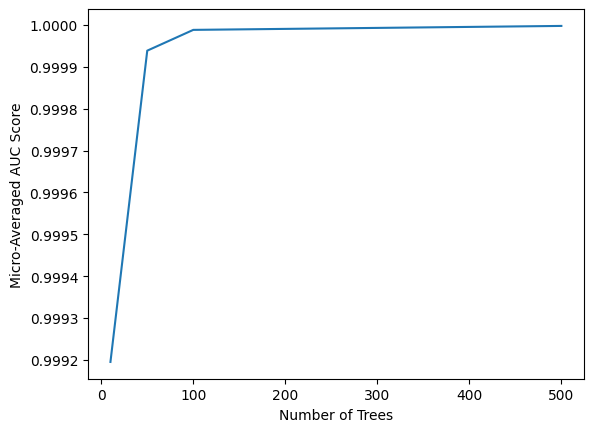

In [ ]:
import matplotlib.pyplot as plt

plt.plot(numTrees, aucScores1)

plt.xlabel('Number of Trees')
plt.ylabel('Micro-Averaged AUC Score')

plt.show()

In [ ]:
learnRate = 0.1

numTrees = [10, 50, 100, 500]
numDepths = [4, 6, 8]

parameters = []
aucScores2 = []
for number in numTrees:
  for depth in numDepths:
    bst = XGBClassifier(n_estimators=number, max_depth = depth, learning_rate=learnRate)
    bst.fit(X = X_train, y =  y_train)

    y_prob = bst.predict_proba(X_val)

    auc = roc_auc_score(
        y_val,
        y_prob,
        multi_class="ovr",
        average="micro" )

    print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{auc}", "for tree num:", number , "and depth:", depth)


    aucScores2.append(auc)
    parameters.append([number,depth])


Micro-averaged One-vs-Rest ROC AUC score:
0.9972246590414791 for tree num: 10 and depth: 4
Micro-averaged One-vs-Rest ROC AUC score:
0.99919515966294 for tree num: 10 and depth: 6
Micro-averaged One-vs-Rest ROC AUC score:
0.9996103966382074 for tree num: 10 and depth: 8
Micro-averaged One-vs-Rest ROC AUC score:
0.9997340899451461 for tree num: 50 and depth: 4
Micro-averaged One-vs-Rest ROC AUC score:
0.9999388656935756 for tree num: 50 and depth: 6
Micro-averaged One-vs-Rest ROC AUC score:
0.9999823959309837 for tree num: 50 and depth: 8
Micro-averaged One-vs-Rest ROC AUC score:
0.9999610357953259 for tree num: 100 and depth: 4
Micro-averaged One-vs-Rest ROC AUC score:
0.9999884984814846 for tree num: 100 and depth: 6
Micro-averaged One-vs-Rest ROC AUC score:
0.9999949213917088 for tree num: 100 and depth: 8
Micro-averaged One-vs-Rest ROC AUC score:
0.9999978880436361 for tree num: 500 and depth: 4
Micro-averaged One-vs-Rest ROC AUC score:
0.9999979496977714 for tree num: 500 and depth

In [ ]:
bestAccuracyIdx= aucScores2.index(max(aucScores2))

bestParameters = parameters[bestAccuracyIdx]

bestDepth = bestParameters[1]

print("The highest score ",max(aucScores2), "belongs to max_depth of:", bestDepth)

The highest score  0.9999982325814516 belongs to max_depth of: 8


In [ ]:
learnRates =  [0.001, 0.01, 0.1]

numTrees = [10, 50, 100, 500]
numDepths = [4, 6, 8]

parameter = []
aucScores3 = []
for number in numTrees:
  for depth in numDepths:
    for rate in learnRates:
      bst = XGBClassifier(n_estimators=number, max_depth= depth, learning_rate= rate, objective='binary:logistic')
      bst.fit(X = X_train, y =  y_train)

      y_prob = bst.predict_proba(X_val)

      auc = roc_auc_score(
          y_val,
          y_prob,
          multi_class="ovr",
          average="micro" )

      print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{auc}", "for tree num:", number , "depth:", depth, "and learning rate:", rate)


      parameter.append([number,depth,rate])
      aucScores3.append(auc)


Micro-averaged One-vs-Rest ROC AUC score:
0.9903593018170136 for tree num: 10 depth: 4 and learning rate: 0.001
Micro-averaged One-vs-Rest ROC AUC score:
0.992322411195653 for tree num: 10 depth: 4 and learning rate: 0.01
Micro-averaged One-vs-Rest ROC AUC score:
0.9972246590414791 for tree num: 10 depth: 4 and learning rate: 0.1
Micro-averaged One-vs-Rest ROC AUC score:
0.9966261883935845 for tree num: 10 depth: 6 and learning rate: 0.001
Micro-averaged One-vs-Rest ROC AUC score:
0.997415530573469 for tree num: 10 depth: 6 and learning rate: 0.01
Micro-averaged One-vs-Rest ROC AUC score:
0.99919515966294 for tree num: 10 depth: 6 and learning rate: 0.1
Micro-averaged One-vs-Rest ROC AUC score:
0.9985440962241846 for tree num: 10 depth: 8 and learning rate: 0.001
Micro-averaged One-vs-Rest ROC AUC score:
0.9987496075910727 for tree num: 10 depth: 8 and learning rate: 0.01
Micro-averaged One-vs-Rest ROC AUC score:
0.9996103966382074 for tree num: 10 depth: 8 and learning rate: 0.1
Micro

In [ ]:
bestAccuracyIdx= aucScores3.index(max(aucScores3))

bestParameters = parameter[bestAccuracyIdx]

bestNumTree = bestParameters[0]
bestDepth = bestParameters[1]
bestLRate = bestParameters[2]

print("The highest score", max(aucScores3), "belongs to tree number of",bestNumTree, \
      "max_depth of:", bestDepth, \
      "and learning rate of:" ,bestLRate)

The highest score 0.9999982325814516 belongs to tree number of 500 max_depth of: 8 and learning rate of: 0.1


In [ ]:
X_combined = np.concatenate((X_train, X_val), axis=0)
y_combined = np.concatenate((y_train, y_val), axis=0)

In [ ]:
from sklearn.metrics import RocCurveDisplay

bst = XGBClassifier(n_estimators=bestNumTree, max_depth= bestDepth, learning_rate= bestLRate, objective='binary:logistic')
bst.fit(X = X_combined, y =  y_combined)

y_prob = bst.predict_proba(X_test)


aucScore = roc_auc_score(
        y_test,
        y_prob,
        multi_class="ovr",
        average="micro" )

print( "The test AUC score is = ", aucScore)

The test AUC score is =  0.999993818870699


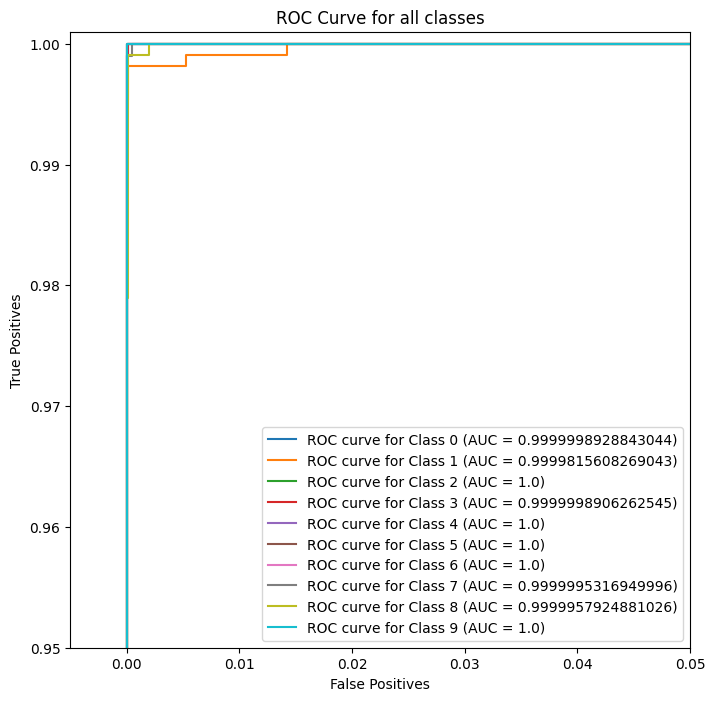

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 8))
target_names = [f"Class {i}" for i in range(10)] #there are 11 classes

for class_id in range(10):
    fpr, tpr, _ = roc_curve((y_test == class_id).astype(int), y_prob[:, class_id])
    roc_auc_class = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"ROC curve for {target_names[class_id]} (AUC = {roc_auc_class})")

plt.xlabel('False Positives')
plt.ylabel('True Positives')
plt.title("ROC Curve for all classes")

plt.xlim([-0.005, 0.05])
plt.ylim([0.95, 1.001])


plt.legend()
plt.show()